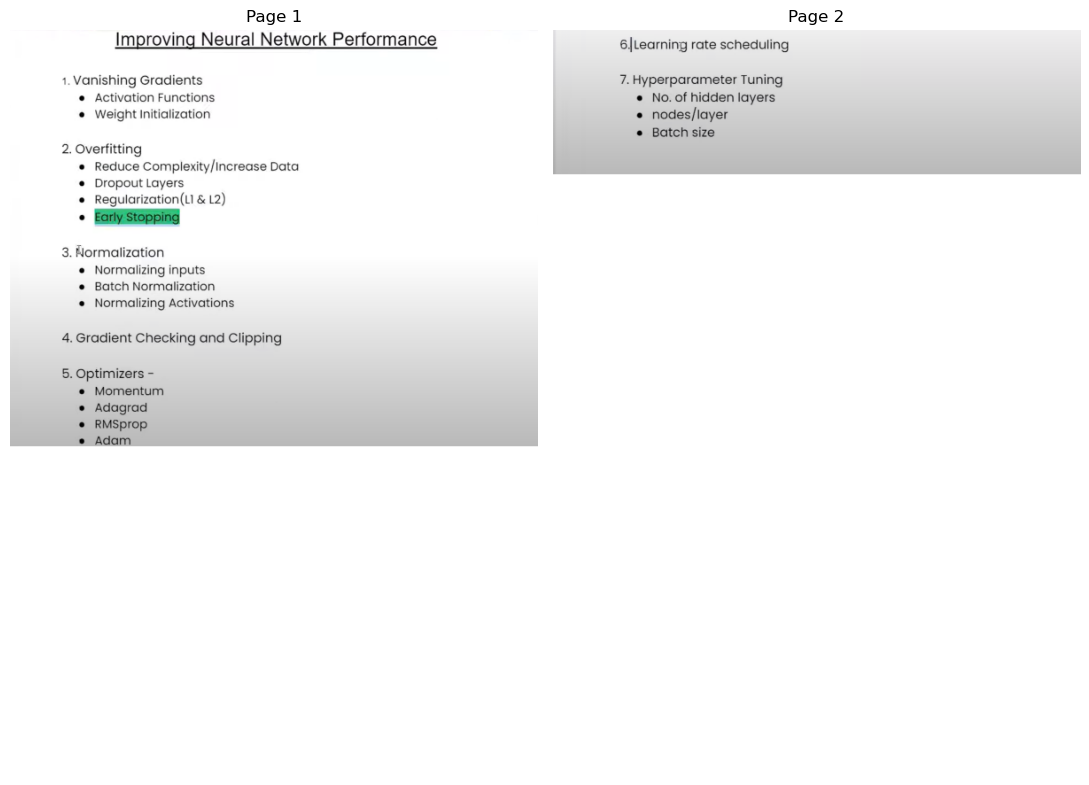

In [26]:
import pymupdf
import matplotlib.pyplot as plt
from PIL import Image
import io

doc = pymupdf.open("./Improving_Neural_Network_Performance.pdf")

# Create a subplot for 2 pages
fig, axes = plt.subplots(1, 2, figsize=(11, 11))

for i in range(2):  # Display first two pages
    page = doc[i]
    pix = page.get_pixmap()
    
    # Convert to PIL image
    img_bytes = pix.tobytes("ppm")
    img = Image.open(io.BytesIO(img_bytes))
    
    # Show the image in subplot
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(f"Page {i + 1}")

plt.tight_layout()
plt.show()


## Vanishing Gradient Problem-
🔍 Why it happens:
1. Activation functions like sigmoid or tanh squash input into a small range (e.g., 0 to 1 or -1 to 1), causing gradients to shrink during backpropagation.

2. In deep networks, repeatedly multiplying small gradients during backpropagation leads to exponential decrease — making the earliest layers effectively “untrainable.”

## common sotutations--
1. reduce model complexity(reduce hidden layers)✅
2. Use ReLU and variants✅--
ReLU (Rectified Linear Unit) doesn’t squash input, so it helps maintain gradient strength.
Variants: Leaky ReLU, ELU, etc.
3. Proper weight initialization--
Methods like Xavier (Glorot) or He initialization are designed to preserve variance across layers.
4. Batch normalization--
Normalizes inputs to each layer, stabilizing learning and helping gradients flow.
5. Residual connections (ResNets)--
Skip connections allow gradients to flow directly across layers, effectively bypassing vanishing paths.

##  Exploading Gradient problem

---

## *How to Improve the Performance of a Neural Network*---

hidden layers-- ,
neurons--,
learning rate--,
optimizer--,
Batch size--,
activation function--,
epchos--📊 
1. Improve the Data
Clean the data:- Remove noise, fix incorrect labels, and handle missing values.

More data:- Collect more training examples if possible.

slow training,overfitting

Feature engineering:- Create or select better features for the model.

 ## 2. *overfitting*--

*reduce model complexity(reduce hidden layers)

*regulization (L1 & L2)

*add more data

A. **early stoping**---stop model training at the middle ..(using call back)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

collback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=5000,batch_size=40,validation_split=0.2,callbacks=collback)
#print(time.time() - start)

B. *dropout layers*---
> drop the nodes of hidden layers or input layers...
<br>
2% performance can be increased..testing time=training time*(1-probability)

In [ ]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))

C. **Reguliizaration**---
<br>
https://colab.research.google.com/drive/1xFo-lVOXC-xWWL5gSXDvO2GB5-phJdZt#scrollTo=lpjYZPGlCsRy

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,), kernel_regularizer=regularizers.l2(0.01)),
    Dense(1)
])

 ---
## 3. *Nata Scaling in Neural Network*---
   1. *Normalization-when range is defined
   2. *standaredization-when range is not defined